# Regressão Linear

Vamos supor que tenhamos dados em tabela sobre duas variáveis: **x** e **y**. Se colocarmos cada par **(x,y)** em um gráfico, teremos uma figura como a seguinte:

![1](https://matheusfacure.github.io/img/tutorial/regr_lin_mqo/scatter.png)

O que o algoritmo de regressão linear faz é simplesmente achar a reta que melhor se encaixa entre os pontos:

Assim, podemos prever (com erro) um valor de y dado um valor de x. Por exemplo, nós não temos uma observação em que x=1, mas gostaríamos de prever qual seria o valor de y caso x fosse 1. Basta então olhar na linha qual valor de y quando x assume o valor 1. Na imagem acima, y seria aproximadamente 2.5 (ponto amarelo).

![2](https://matheusfacure.github.io/img/tutorial/regr_lin_mqo/scatter_line.png)

Ok. Esse exemplo é bem simples e meramente ilustrativo. Suponha agora que y não dependa mais apenas de x, mas de x e z. Bem, nesse caso, teríamos um gráfico em 3D e a regressão linear acharia o plano que melhor se encaixa nos dados. E para mais dimensões? Digamos que y dependa de 100 variáveis. Nós não podemos mais visualizar esse caso, mas sabemos que não é muito diferente dos casos 2D ou 3D, só que agora a regressão linear acha o hiperplano que melhor se encaixa nos dados. Se isso está um pouco abstrato e difícil de visualizar, pense  sempre em 3D quando trabalhando com muitas dimensões. É um truque muito útil que eu aprendi em um vídeo do professor de Geoffrey Hinton e, segundo ele, todo mundo faz isso: quando tentar visualizar 100 dimensões, por exemplo, pense em 3D e grite para si mesmo "100D" e você conseguirá abstrair grandes dimensionalidades.

### Justificativa matemática
Imagine que temos dados em tabela, sendo que cada linha é uma observação e cada coluna uma variável. Então escolhemos uma das colunas para ser nossa variável dependente y (aquela que queremos prever) e as outras serão as variáveis independentes (X). Nosso objetivo é aprender como chegar das variáveis independentes na variável dependente, ou, em outras palavras, prever y a partir de X. Note que X é uma matriz nxd, em que n é o número de observações e d o número de dimensões; y é um vetor coluna nx1. Podemos definir o problema como um sistema de equações em que cada equação é uma observação:

$\begin{cases}
w_0 + w_1 x_1 + ... + w_d x_1 = y_1 \\
w_0 + w_1 x_2 + ... + w_d x_2 = y_2 \\
... \\
w_0 + w_1 x_n + ... + w_d x_n = y_n \\
\end{cases}$

Normalmente $n > d$, isto é, temos mais observações que dimensões. Sistemas assim costumam não ter solução, pois há muitas equações e poucas variáveis para ajustar. Intuitivamente, pense que, na prática, muitas coisas afetam a variável y, principalmente se ela for algo de interesse das ciências humanas como, por exemplo, preço, desemprego, felicidade etc. Muitas das coisas que afetam y não podem ser coletadas como dados; desse modo, as equações acima não teriam solução porque não teríamos todos os fatores que afetam y.

Para lidar com esse problema, vamos adicionar nas equações um termo erro ε que representará os fatores que não conseguimos observar, erros de medição, etc.

$\begin{cases}
w_0 + w_1 x_{11} + ... + w_d x_{1d} + \varepsilon_1 = y_1 \\
w_0 + w_1 x_{21} + ... + w_d x_{2d} + \varepsilon_2 = y_2 \\
... \\
w_0 + w_1 x_{n1} + ... + w_d x_{nd} + \varepsilon_3 = y_n \\
\end{cases}$

Ou, em forma de matriz:

$\begin{bmatrix}
1 & x_{11} & ... & x_{1d} \\
1 & x_{21} & ... & x_{2d} \\
\vdots & \vdots& \vdots & \vdots \\
1 & x_{n1} & ... & x_{nd} \\
\end{bmatrix}
\times
\begin{bmatrix}
w_0 \\
w_1 \\
\vdots \\
w_d \\
\end{bmatrix}
+
\begin{bmatrix}
\varepsilon_0 \\
\varepsilon_1 \\
\vdots \\
\varepsilon_n \\
\end{bmatrix}
=
\begin{bmatrix}
y_0 \\
y_1 \\
\vdots \\
y_n \\
\end{bmatrix}$

$X_{nd} \pmb{w}_{d1} + \pmb{\epsilon}_{n1} = \pmb{y}_{n1}$

Para estimar a equação acima, usaremos a técnica de Mínimos Quadrados Ordinários (MQO): queremos achar os $\pmb{\hat{w}}$  que minimizam os $n \varepsilon^2$, ou, na forma de vetor, $\pmb{\epsilon}^T \pmb{\epsilon}$. Por que minimizar os erros quadrados? Assim como todo algoritmo de Aprendizado de Máquina, regressão linear também pode ser encarada como problemas de minimização de função custo. Então, nesse caso, nossa função custo é $L = \pmb{\epsilon}^T \pmb{\epsilon}$. Um nome comum dessa função é o custo quadrático $L2$, pois nesse caso o custo é o quadrado da norma $L2$ do vetor $\pmb{\epsilon}$. Note que nós poderíamos usar também a norma $L1$ do mesmo vetor como função custo. Ou ainda, poderíamos usar outras funções que adicionam uma penalidade também para o tamanho de $\pmb{\hat{w}}$, como acontece nos algoritmos de regressão Ridge ou Lasso, mas isso terá que ficar para outro tutorial. Por hora, a soma dos mínimos quadrados bastará como função custo, até porque ela tem a vantagem de deixar a matemática muito mais simples:

$\pmb{\epsilon}^T  \pmb{\epsilon} = (\pmb{y} - \pmb{\hat{w}}X)^T(\pmb{y} - \pmb{\hat{w}} X) \\= \pmb{y}^T \pmb{y} - \pmb{\hat{w}}^T X^T \pmb{y} - \pmb{y}^T X \pmb{\hat{w}} + \pmb{\hat{w}} X^T X \pmb{\hat{w}} \\= \pmb{y}^T \pmb{y} - 2\pmb{\hat{w}}^T X^T \pmb{y} + \pmb{\hat{w}} X^T X \pmb{\hat{w}}$

![]()

![]()


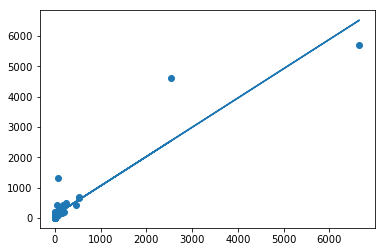

In [3]:
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt

#read data
dataframe = pd.read_fwf('brain_body.txt')
x_values = dataframe[['Brain']]
y_values = dataframe[['Body']]

#train model on data
body_reg = linear_model.LinearRegression()
body_reg.fit(x_values, y_values)

#visualize results
plt.scatter(x_values, y_values)
plt.plot(x_values, body_reg.predict(x_values))
plt.show()

Para o modelo de Regressão Linear, será usada a classe do scikit-learn chamada **LinearRegression**. Essa classe tem a função **fit()** que treina o modelo nos seus dados.

```
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_values, y_values)
```

Como no exemplo acima, a variável model é um modelo de Regressão Linear que foi treinado nos dados de x_values e y_values. Treinar o modelo significa encontrar a melhor linha que se encaixe nos dados de treinamento. Vamos fazer duas predições usando a função predict() do modelo.

```
print(model.predict([ [127], [248] ]))
>>> [[ 438.94308857, 127.14839521]]
```

O modelo retorna um vetor de previsões, uma previsão para cada vetor de entrada. O primeiro item, [127], teve a previsão de 438.94308857. Já o segundo item, [248], recebeu a previsão de 127.14839521. A razão para a previsão ser feita em um vetor como [127] e não apenas no número 127, é porque você pode ter um modelo que faz previsões baseadas em diversas características. Nós veremos o uso de múltiplas variáveis em regressão linear mais adiante nessa aula. Por enquanto, vamos estudar o uso de apenas uma.

## Regressão Linear - Quiz
Neste quiz, você trabalhará com dados sobre a média da expectativa de vida e a média do IMC no nascimento de homens ao redor do mundo. Os dados vem do Gapminder.

O arquivo de dados pode ser encontrado na aba "bmi_and_life_expectancy.csv" do quiz abaixo. Os dados incluem também o país de origem das pessoas, presentes na coluna "Country". A expectativa de vida para uma pessoa daquele país está na coluna "Life expectancy". A média do IMC de uma criança nascida naquele país na coluna "BMI". Você preverá a expectativa de vida baseado no IMC.

Você deverá completar cada um dos seguintes passos:

#### 1. Carregar os dados

* Os dados estão no arquivo chamado "bmi_and_life_expectancy.csv".
* Use a função do pandas chamada read_csv para carregar os dados em um dataframe.
* Salve o dataframe na variável bmi_life_data.

#### 2. Construa um modelo de regressão linear

* Crie um modelo de regressão usando o objeto LinearRegression do scikit-learn e salve-o na variável bmi_life_model.
* Treine o modelo com os dados.

#### 3. Faça previsões com o modelo
* Faça previsões usando um IMC de 21.07931 e o salve na variável laos_life_exp.

In [1]:
# TODO: Add import statements
import pandas as pd
from sklearn.linear_model import LinearRegression

# Assign the dataframe to this variable.
# TODO: Load the data
bmi_life_data = pd.read_csv("bmi_and_life_expectancy.csv")

# Make and fit the linear regression model
#TODO: Fit the model and Assign it to bmi_life_model
bmi_life_model = LinearRegression()
bmi_life_model.fit(bmi_life_data[['BMI']], bmi_life_data[['Life expectancy']])

# Mak a prediction using the model
# TODO: Predict life expectancy for a BMI value of 21.07931
laos_life_exp = bmi_life_model.predict(21.07931)

In [2]:
laos_life_exp

array([[ 60.31564716]])

## Avisos sobre a regressão linear

A regressão linear vem com uma série de suposições implícitas que nem sempre a fazem o melhor modelo para determinada situação. Eis alguns exemplos de problemas que você deve ter em mente.

#### Regressão linear funciona melhor quando os dados são lineares
A regressão linear produz um modelo que é uma linha reta extraída a partir dos dados de treinamento. Se a relação entre os dados de treinamento não for de fato linear, será necessário fazer alguns ajustes (transformações nos dados de treinamento), adicionar novas variáveis (veremos isso a seguir) ou, ainda, usar outro tipo de modelo

![quadraticlinearregression](quadraticlinearregression.png)

#### Regressões lineares são sensíveis a casos extraordinários
A regressão linear tenta encontrar a linha que "melhor se encaixa" nos dados de treinamento. Caso o conjunto de dados tenha valores extremos que fujam muito do padrão geral, eles podem ter um efeito inesperadamente grande no modelo.

Neste primeiro gráfico, o modelo se encaixa nos dados muito bem.

![lin-reg-no-outliers](lin-reg-no-outliers.png)

No entanto, se adicionarmos alguns pontos extraordinários que não se encaixam no padrão, o modo como o modelo faz previsões muda radicalmente.

![lin-reg-w-outliers](lin-reg-w-outliers.png)

Na maioria dos casos, será desejável criar um modelo que se encaixe na maioria dos dados, então, tome cuidado com os casos extraordinários!

## Regressão linear múltipla
Na última seção, vimos que é possível prever a expectativa de vida usando o IMC. Nesse caso, dizemos que o IMC era o preditor, também chamado de variável independente. O preditor é a variável que se procura para fazer previsões sobre outras variáveis, enquanto os valores que se busca prever são chamados de variável dependente. Neste nosso caso, a variável dependente era a expectativa de vida.

Agora, digamos que também temos a frequência cardíaca de cada pessoa. É possível criar uma previsão de expectativa de vida usando tanto o IMC como a frequência cardíaca?

Claro que sim! Podemos fazer exatamente isso usando a regressão linear múltipla.

Caso o resultado que você quer prever dependa de mais de uma variável, é possível fazer um modelo um pouco mais complexo, que leve isso em consideração. Desde que sejam relevantes para situação, quanto mais variáveis preditoras/independentes seu modelo tiver, melhores podem ser as previsões.

Quando há apenas um preditor, o modelo da regressão linear é uma linha, mas, ao adicionar mais variáveis preditoras, são adicionadas mais dimensões ao desenho.

Ao usar a variável preditora, a equação da linha é:

$y = mx + b$

E o gráfico resultante é algo parecido com isso:

![just-a-simple-lin-reg](just-a-simple-lin-reg.png)

#### Regressão linear com uma variável preditora

Ao adicionar uma variável preditora, totalizando duas, a equação de previsão vira:

$y = m^1x^1 + m^2x^2 + b$

Para representar isso graficamente, precisaremos de um gráfico tridimensional, com o modelo de regressão linear representado como um plano:

![just-a-2d-reg](just-a-2d-reg.png)

#### Regressão linear com duas variáveis preditoras

Você pode usar mais de duas variáveis preditoras. Na verdade, pode usar quantos quiser. Se você utilizar nn variáveis preditoras, o modelo poderá ser representado pela equação

$y = m^1x^1 + m^2x^2 + m^3x^3 + m^nx^n + b$

Conforme constrói modelos com mais variáveis, a visualização vai ficando mais difícil, mas, por sorte, todo o restante em relação à regressão linear permanece igual. Ainda podemos incluir modelos e fazer previsões da mesma maneira - vamos fazer um teste!

### Quiz de programação: Regressão linear múltipla
Neste quiz, você usará o conjunto de dados [Boston house-prices](https://archive.ics.uci.edu/ml/datasets/Housing). Ele consiste em 13 características de 506 casas, e seu valor médio é de cerca de US$ 1000. Você aplicará um modelo às 13 características para prever o valor das casas.

É necessário concluir os seguintes passos:

#### 1. Construa um modelo de regressão linear
* Crie um modelo de regressão linear usando o LinearRegression do scikit-learn e o aloque a model.
* Aplique o modelo aos dados.

#### 2. Faça previsões usando o modelo
* Preveja o valor de sample_house.

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

# Load the data from the the boston house-prices dataset 
boston_data = load_boston()
x = boston_data['data']
y = boston_data['target']

# Make and fit the linear regression model
# TODO: Fit the model and Assign it to the model variable
model = LinearRegression()
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
# Mak a prediction using the model
sample_house = [[2.29690000e-01, 0.00000000e+00, 1.05900000e+01, 0.00000000e+00, 4.89000000e-01,
                6.32600000e+00, 5.25000000e+01, 4.35490000e+00, 4.00000000e+00, 2.77000000e+02,
                1.86000000e+01, 3.94870000e+02, 1.09700000e+01]]

In [40]:
model.coef_

array([ -1.07170557e-01,   4.63952195e-02,   2.08602395e-02,
         2.68856140e+00,  -1.77957587e+01,   3.80475246e+00,
         7.51061703e-04,  -1.47575880e+00,   3.05655038e-01,
        -1.23293463e-02,  -9.53463555e-01,   9.39251272e-03,
        -5.25466633e-01])

In [41]:
model.intercept_

36.491103280359525

In [42]:
# TODO: Predict housing price for the sample_house
prediction = model.predict(sample_house)

# 23.68420569227329 is the correct prediction!
prediction

array([ 23.68420569])

## How to Do Linear Regression the Right Way

This is the code for the "How to Do Linear Regression the Right Way" live session by Siraj Raval on Youtube

#### Overview
This is the code for [this video on Youtube by Siraj Raval](https://youtu.be/uwwWVAgJBcM). I'm using a small dataset of student test scores and the amount of hours they studied. Intuitively, there must be a relationship right? The more you study, the better your test scores should be. We're going to use [linear regression](https://onlinecourses.science.psu.edu/stat501/node/250) to prove this relationship.

Here are some helpful links:

Gradient descent visualization
![gd](https://raw.githubusercontent.com/mattnedrich/GradientDescentExample/master/gradient_descent_example.gif)

Sum of squared distances formula (to calculate our error)
![lre](https://spin.atomicobject.com/wp-content/uploads/linear_regression_error1.png)

Partial derivative with respect to b and m (to perform gradient descent)
![lrg](https://spin.atomicobject.com/wp-content/uploads/linear_regression_gradient1.png)


In [31]:
#The optimal values of m and b can be actually calculated with way less effort than doing a linear regression. 
#this is just to demonstrate gradient descent

from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    # initialize it at 0
    totalError = 0
    # for every point
    for i in range(0, len(points)):
        # get the x value
        x = points[i, 0]
        # get the y value
        y = points[i, 1]
        # get the diference, square it, add it to the total
        totalError += (y - (m * x + b)) ** 2
        #print("error = ", totalError)
        
    # get the average
    return totalError / float(len(points))

# Magic the greatest the greatest
def step_gradient(b_current, m_current, points, learningRate):
    # starting points for our gradients
    b_gradient = 0
    m_gradient = 0
    
    # é a quantidade de pontos
    N = float(len(points))
    
    # para cada ponto vamos calcular a derivada parcial em relação ao b e ao m.
    # isso vai nos dar uma direção a seguir.
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        # direction with respect to b and m computing partial derivatives of our erro function
        # esses são os calculos da nossa derivada parcial para b e m
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
        
    # update our b and m values using our partial derivatives    
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    # starting b and m
    b = starting_b
    m = starting_m
    
    # gradient descent
    for i in range(num_iterations):
        # update b and m with the new more accurate b and m by performing this gradient step
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run():
    # Step 1 - collect our data
    points = genfromtxt("data.csv", delimiter=",")
    
    # Step 2 - define our hyperparamters
    # How fast should our model converge? Convergir significa obter o resultado ideal, o melhor ajuste da linha
    learning_rate = 0.0001
    # y = mx + b {Slope formula - Essa é a fórmula da inclinação}
    # Todas as linhas seguem esta fórmula, onde m é a inclinação, b é a intercepção e x e y os pontos.
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = 1000
    
    # Step 3 - train our model
    # Exibe os valores iniciais de b e m.
    print("Starting gradient descent at b = {0}, m = {1}, error = {2}"
          .format(initial_b, initial_m, 
                  compute_error_for_line_given_points(initial_b, initial_m, points)))
    
    print("\nRunning...")
    
    # Vamos executar nosso gradient descent que vai nos dar nossa inclinação (b) ideal, e nossa
    # descida (m) ideal.
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    
    print("\nAfter {0} iterations \n  b = {1}, \n  m = {2}, \n  error = {3}"
          .format(num_iterations, b, m, 
                  compute_error_for_line_given_points(b, m, points)))

In [32]:
run()

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211

Running...

After 1000 iterations 
  b = 0.08893651993741346, 
  m = 1.4777440851894448, 
  error = 112.61481011613473


# Linear and Polynomial Regression in Python

This brief tutorial demonstrates how to use Numpy and SciPy functions in Python to regress linear or polynomial functions that minimize the least squares difference between measured and predicted values.

In [43]:
from numpy import *

In [44]:
x = array([0, 1, 2, 3, 4, 5])
y = array([0, 0.8, 0.9, 0.1, -0.8, -1])

In [46]:
print(x)
print(y)

[0 1 2 3 4 5]
[ 0.   0.8  0.9  0.1 -0.8 -1. ]


In [47]:
from scipy.interpolate import *

In [49]:
p1 = polyfit(x,y,1)

# slope and intercept
print(p1)

[-0.30285714  0.75714286]


In [51]:
from matplotlib.pyplot import *
%matplotlib inline

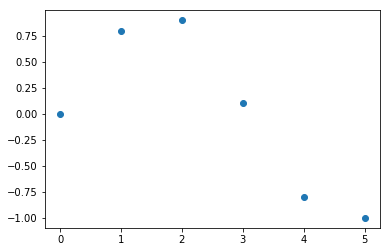

In [52]:
plot(x,y,'o')

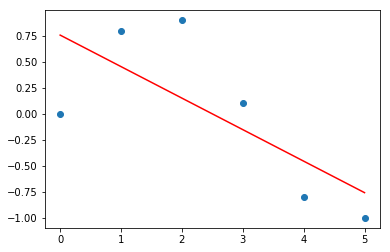

In [54]:
plot(x,y,'o')
plot(x, polyval(p1, x), 'r-')

In [55]:
p2 = polyfit(x,y,2)
p3 = polyfit(x,y,3)

In [57]:
print(p1,'\n')
print(p2,'\n')
print(p3)

[-0.30285714  0.75714286] 

[-0.16071429  0.50071429  0.22142857] 

[ 0.08703704 -0.81349206  1.69312169 -0.03968254]


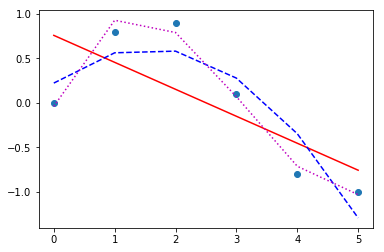

In [58]:
plot(x,y,'o')
plot(x, polyval(p1, x), 'r-')
plot(x, polyval(p2, x), 'b--')
plot(x, polyval(p3, x), 'm:')

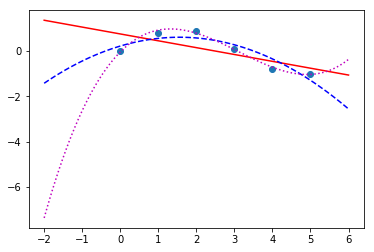

In [59]:
plot(x,y,'o')
xp = linspace(-2,6,100)
plot(xp, polyval(p1, xp), 'r-')
plot(xp, polyval(p2, xp), 'b--')
plot(xp, polyval(p3, xp), 'm:')

In [62]:
yfit = p1[0] * x * p1[1]
print(yfit)
print(y)

[-0.         -0.22930612 -0.45861224 -0.68791837 -0.91722449 -1.14653061]
[ 0.   0.8  0.9  0.1 -0.8 -1. ]


In [64]:
yresid = y - yfit
SSresid = sum(pow(yresid,2))
SStotal = len(y) * var(y)
rsq = 1 - SSresid/SStotal

print(rsq)

-0.148814993753


In [65]:
from scipy.stats import *

slope, intercept, r_value, p_value, std_err = linregress(x,y)
print(pow(r_value,2))

0.517788018433


In [66]:
print(p_value)

0.106931296554


* https://medium.com/@lachlanmiller_52885/machine-learning-week-1-cost-function-gradient-descent-and-univariate-linear-regression-8f5fe69815fd
* https://www.hackerearth.com/blog/machine-learning/gradient-descent-algorithm-linear-regression/
* https://onlinecourses.science.psu.edu/stat501/node/250
* https://mathinsight.org/image/partial_derivative_as_slope
* http://www.dummies.com/education/math/calculus/how-to-use-a-partial-derivative-to-measure-a-slope-in-three-dimensions/
* https://spin.atomicobject.com/2014/06/24/gradient-descent-linear-regression/
* https://www.quora.com/What-is-an-intuitive-explanation-of-gradient-descent
* https://machinelearningmastery.com/gradient-descent-for-machine-learning/

# Simple Linear Regression

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [68]:
data = pd.read_csv('Simple Linear Regression.csv')
data.head()

,year,staff_wage_mean,shanghai_GDP
0,1978,672,272.81
1,1979,784,286.43
2,1980,873,311.89
3,1981,870,324.76
4,1982,883,337.07


In [69]:
train, test = train_test_split(data, test_size=0.25, random_state=27)

In [70]:
lr = linear_model.LinearRegression()
lr.fit(train.staff_wage_mean.values.reshape(-1,1), train.shanghai_GDP.values.reshape(-1,1))
pred = lr.predict(test.staff_wage_mean.values.reshape(-1,1))
RSS = np.mean((pred - test.shanghai_GDP.values.reshape(-1,1)) ** 2)
R_squares = lr.score(test.staff_wage_mean.values.reshape(-1,1), test.shanghai_GDP.values.reshape(-1,1))

Coefficients: [[ 0.36180741]]
intercept: [-376.11549657]
Residual sum of squares: 82171.87
Variance score: 1.00


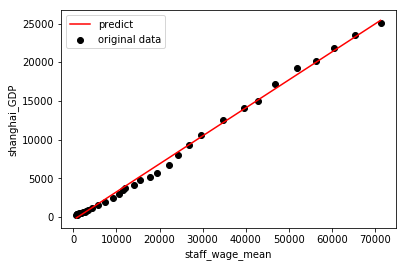

In [71]:
print('Coefficients:', lr.coef_)
print('intercept:', lr.intercept_)
print("Residual sum of squares: %.2f" % RSS)
print('Variance score: %.2f' % R_squares)
plt.scatter(data.staff_wage_mean, data.shanghai_GDP, color = 'black', label="original data")
plt.plot(data.staff_wage_mean,lr.predict(data.staff_wage_mean.values.reshape(-1,1)), 'r', label="predict")
plt.legend(loc="upper left")
plt.xlabel('staff_wage_mean')  
plt.ylabel('shanghai_GDP')
plt.show()

# Multiple Linear Regression

In [75]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns

In [76]:
data = pd.read_csv('Multiple Linear Regression.csv')

data.head()

,year,staff_wage_mean,shanghai_GDP,fixed_asset_investment,cpi,house_area,house_popula_mean
0,1978,672,272.81,27.91,100.0,234.03,3.77
1,1979,784,286.43,35.58,100.9,564.62,3.82
2,1980,873,311.89,45.43,106.9,607.91,3.77
3,1981,870,324.76,54.60,108.3,649.93,3.70
4,1982,883,337.07,71.34,108.7,684.61,3.67


In [77]:
data.drop(['year'], axis = 1).describe()

,staff_wage_mean,shanghai_GDP,fixed_asset_investment,cpi,house_area,house_popula_mean
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,18997.657895,6507.400789,2120.031053,407.578947,2812.162632,3.034737
std,21045.624730,7648.870836,2116.264094,227.130758,2440.915147,0.373904
min,672.000000,272.810000,27.910000,100.000000,234.030000,2.690000
25%,1989.000000,571.170000,193.415000,154.700000,804.360000,2.750000
50%,11044.000000,3198.170000,1863.195000,518.650000,1667.640000,2.840000
75%,28882.500000,10241.095000,3829.455000,572.475000,5702.160000,3.267500
max,71268.000000,25123.450000,6352.700000,748.400000,7580.770000,3.820000


In [78]:
feature = [x for x in data.columns if x not in ['year', 'shanghai_GDP']]
target = ['shanghai_GDP']

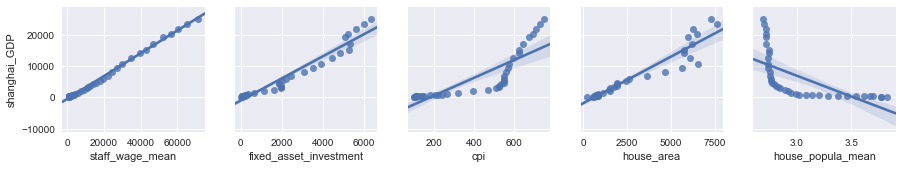

In [79]:
g = sns.pairplot(data.drop(['year'], axis = 1), kind="reg",  x_vars= feature, y_vars=target)

In [80]:
X_train, X_test, y_train, y_test = train_test_split(data[feature], data[target], test_size=0.25, random_state=27)

In [81]:
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
RSS = np.mean((pred - y_test) ** 2)
R_squares = lr.score(X_test, y_test)

In [82]:
print('Coefficients:\n', lr.coef_)
print('intercept:', lr.intercept_)
print("Residual sum of squares: %.2f" % RSS)
print('Variance score: %.2f' % R_squares)

Coefficients:
 [[  3.56891902e-01   6.14236796e-01  -4.96668092e+00  -1.11850146e-01
   -2.46190630e+02]]
intercept: [ 1481.06549865]
Residual sum of squares: 38328.17
Variance score: 1.00


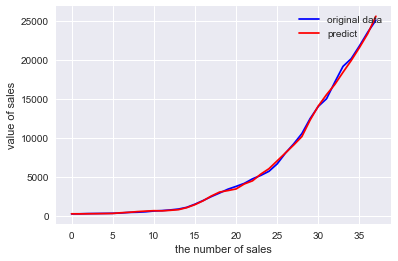

In [83]:
plt.plot(range(len(data)),data.shanghai_GDP,'b', label="original data")  
plt.plot(range(len(data)),lr.predict(data[feature]),'r',label="predict")  
plt.legend(loc="upper right")
plt.xlabel("the number of sales")  
plt.ylabel('value of sales')

# Polynomial Regression

In [84]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns

In [85]:
data = pd.read_csv('Polynomial Regression.csv')
data.head()

,year,shanghai_GDP,cpi,house_popula_mean
0,1978,272.81,100.0,3.77
1,1979,286.43,100.9,3.82
2,1980,311.89,106.9,3.77
3,1981,324.76,108.3,3.70
4,1982,337.07,108.7,3.67


In [86]:
data.drop(['year'], axis=1).describe()

,shanghai_GDP,cpi,house_popula_mean
count,38.000000,38.000000,38.000000
mean,6507.400789,407.578947,3.034737
std,7648.870836,227.130758,0.373904
min,272.810000,100.000000,2.690000
25%,571.170000,154.700000,2.750000
50%,3198.170000,518.650000,2.840000
75%,10241.095000,572.475000,3.267500
max,25123.450000,748.400000,3.820000


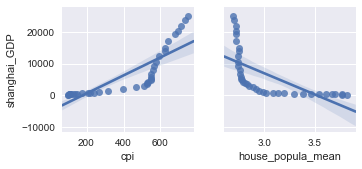

In [87]:
feature = [x for x in data.columns if x not in ['year', 'shanghai_GDP']]
target = ['shanghai_GDP']
g = sns.pairplot(data, kind="reg", x_vars= feature, y_vars=target)

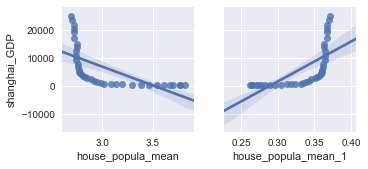

In [88]:
data['house_popula_mean_1'] = 1/data.house_popula_mean
g = sns.pairplot(data.drop(['year'], axis = 1), kind="reg",
                 x_vars=['house_popula_mean', 'house_popula_mean_1'], y_vars=target)

In [89]:
def lr_fit_predict(X_train, X_test, y_train, y_test):
    lr = linear_model.LinearRegression()
    lr.fit(X_train, y_train)
    pred = lr.predict(X_test)
    RSS = np.mean((pred - y_test) ** 2)
    R_squares = lr.score(X_test, y_test)
    print('Coefficients:\n', lr.coef_)
    print('intercept:', lr.intercept_)
    print("Residual sum of squares: %.2f" % RSS)
    print('Variance score: %.3f' % R_squares)
    plt.plot(range(len(data)),data.shanghai_GDP,'b', label="original data")  
    plt.plot(range(len(data)),lr.predict(data[feature]),'r',label="predict")  
    plt.legend(loc="upper right")
    plt.xlabel("the number of sales")  
    plt.ylabel('value of sales')

Coefficients:
 [[  5.40176640e+01  -1.67133720e+05]]
intercept: [ 40277.11251265]
Residual sum of squares: 13844089.36
Variance score: 0.784


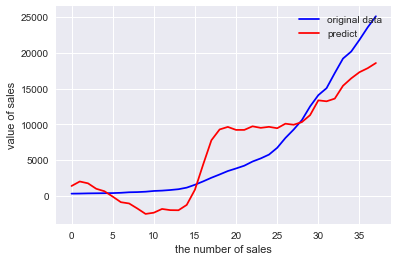

In [90]:
feature = [x for x in data.columns if x not in ['year', 'shanghai_GDP', 'house_popula_mean']]
X_train, X_test, y_train, y_test = train_test_split(data[feature], data[target], test_size=0.25, random_state=27)
lr_fit_predict(X_train, X_test, y_train, y_test)

Coefficients:
 [[   -555.93811634 -101467.86763682    1558.41276358]]
intercept: [ 42665.52202685]
Residual sum of squares: 5734974.38
Variance score: 0.911


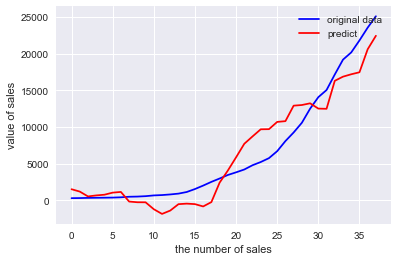

In [91]:
data['house_popula_mean_1_&_cpi_square'] = data.house_popula_mean_1*data.cpi
feature = [x for x in data.columns if x not in ['year', 'shanghai_GDP', 'house_popula_mean']]
X_train, X_test, y_train, y_test = train_test_split(data[feature], data[target], test_size=0.25, random_state=27)
lr_fit_predict(X_train, X_test, y_train, y_test)

Coefficients:
 [[ -6.63738813e+02   2.65415867e+06   1.97016721e+03  -4.77046220e+06]]
intercept: [-354281.48960858]
Residual sum of squares: 2107352.56
Variance score: 0.967


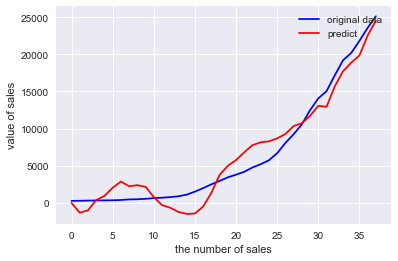

In [92]:
data['house_popula_mean_1_square'] = data.house_popula_mean_1**2
feature = [x for x in data.columns if x not in ['year', 'shanghai_GDP', 'house_popula_mean']]
X_train, X_test, y_train, y_test = train_test_split(data[feature], data[target], test_size=0.25, random_state=27)
lr_fit_predict(X_train, X_test, y_train, y_test)

Coefficients:
 [[  1.35928457e+02  -1.38650035e+06  -9.11680985e+02   2.81563645e+06
    2.26464577e-01]]
intercept: [ 178474.93409796]
Residual sum of squares: 1258953.37
Variance score: 0.980


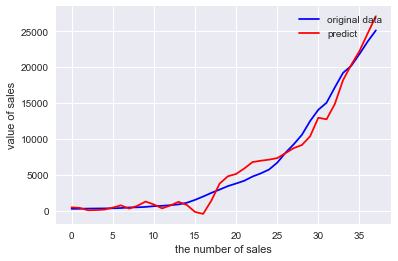

In [93]:
data['cpi_square'] = data.cpi**2
feature = [x for x in data.columns if x not in ['year', 'shanghai_GDP', 'house_popula_mean']]
X_train, X_test, y_train, y_test = train_test_split(data[feature], data[target], test_size=0.25, random_state=27)
lr_fit_predict(X_train, X_test, y_train, y_test)